In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import psycopg2
from psycopg2.extras import execute_values

In [11]:
try:
    conn = psycopg2.connect(database='parceldatabase', user='techequity', password='clinic')
    print("successfully connected to database")
except:
    print("I am unable to connect to the database")

successfully connected to database


In [13]:
# cursor
cur = conn.cursor()
    
get_cols_query = "select center_lat, center_lon, nettaxablevalue from rawparceltable"
sample_data = [];
try: 
    cur.execute(get_cols_query)
    sample_data = cur.fetchall()
    
    print("query successful")
except:
    print("query failed")

    
print(sample_data[0:10])

query successful
[('34.22021979', '-118.62066881', '756000'), ('34.22021979', '-118.62066881', '771120'), ('34.22021979', '-118.62066881', '700200'), ('34.22021979', '-118.62066881', '478600'), ('34.22021979', '-118.62066881', '478600'), ('34.22021979', '-118.62066881', '528000'), ('34.22021979', '-118.62066881', '463000'), ('34.22021979', '-118.62066881', '530000'), ('34.22021979', '-118.62066881', '615000'), ('34.22021979', '-118.62066881', '615000')]


In [85]:
nettax = [float(item[2]) for item in sample_data]
lat = [float(item[0]) for item in sample_data]
long = [float(item[1]) for item in sample_data]

In [88]:
data = list(zip(lat,long,nettax))

In [90]:
df = pd.DataFrame(data, columns=['latitutde','longitude',
                                       'nettaxablevalue'])

In [91]:
df

,latitutde,longitude,nettaxablevalue
0,34.220220,-118.620669,756000.0
1,34.220220,-118.620669,771120.0
2,34.220220,-118.620669,700200.0
3,34.220220,-118.620669,478600.0
4,34.220220,-118.620669,478600.0
...,...,...,...
995,34.222322,-118.621431,283105.0
996,34.222322,-118.621431,282434.0
997,34.222322,-118.621431,284560.0
998,34.222322,-118.621431,290250.0


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
train, test = train_test_split(df,test_size=0.3)

In [94]:
x_train, y_train, x_test, y_test = train, train, test, test

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scaler = MinMaxScaler(feature_range=(0,1))

In [97]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [98]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
rmse_val = []
for K in range(20):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for K= ', K, 'is:', error)

RMSE value for K=  1 is: 19854.47578977261
RMSE value for K=  2 is: 18190.222530051076
RMSE value for K=  3 is: 17134.426845234466
RMSE value for K=  4 is: 16765.893008146777
RMSE value for K=  5 is: 16610.826364355133
RMSE value for K=  6 is: 16308.62297284197
RMSE value for K=  7 is: 16083.500333313663
RMSE value for K=  8 is: 15999.242126022742
RMSE value for K=  9 is: 15886.478040512115
RMSE value for K=  10 is: 16335.546494534552
RMSE value for K=  11 is: 16579.785216031134
RMSE value for K=  12 is: 16843.540266953707
RMSE value for K=  13 is: 17134.657860869396
RMSE value for K=  14 is: 17550.332298925394
RMSE value for K=  15 is: 18158.7610312212
RMSE value for K=  16 is: 18642.163882846213
RMSE value for K=  17 is: 19458.09871542873
RMSE value for K=  18 is: 20074.68355322638
RMSE value for K=  19 is: 20465.796467633383
RMSE value for K=  20 is: 21005.69679340524


### We get the lowest RMSE at K=9

<AxesSubplot:>

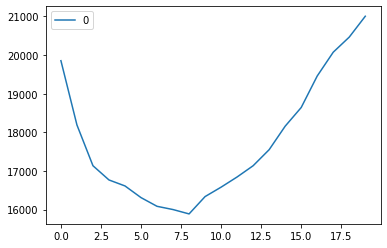

In [100]:
curve = pd.DataFrame(rmse_val)
curve.plot()

Text(0, 0.5, 'Error Rate')

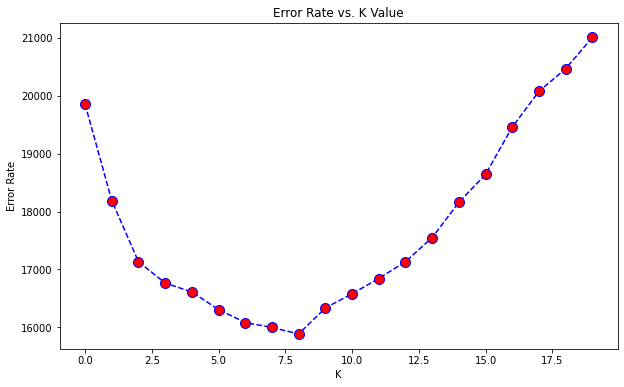

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(0,20),rmse_val,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')